<a href="https://colab.research.google.com/github/Heba2424/Iris-Neural-Network/blob/main/Iris_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


#train-test
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics


from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping



#plotly
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# Read Data
iris = pd.read_csv("IRIS.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


##Exploratory Data Analysis (EDA)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
iris.describe(include = 'object').T

,count,unique,top,freq
species,150,3,Iris-setosa,50


In [8]:
fig = px.bar(iris, x="species",pattern_shape_sequence=["x"])
fig.show()

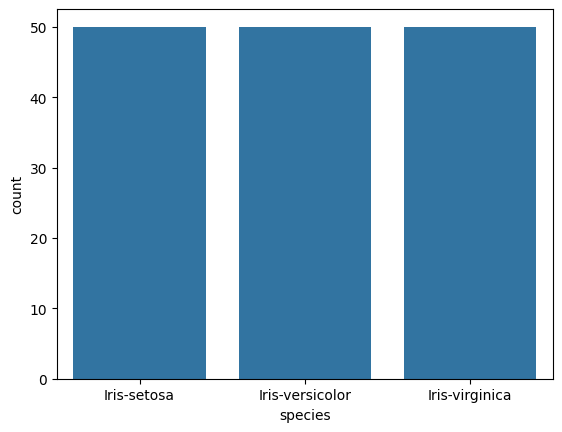

<Figure size 1000x600 with 0 Axes>

In [9]:
sns.countplot(x = iris['species'] )
plt.figure(figsize=(10, 6))
plt.show()

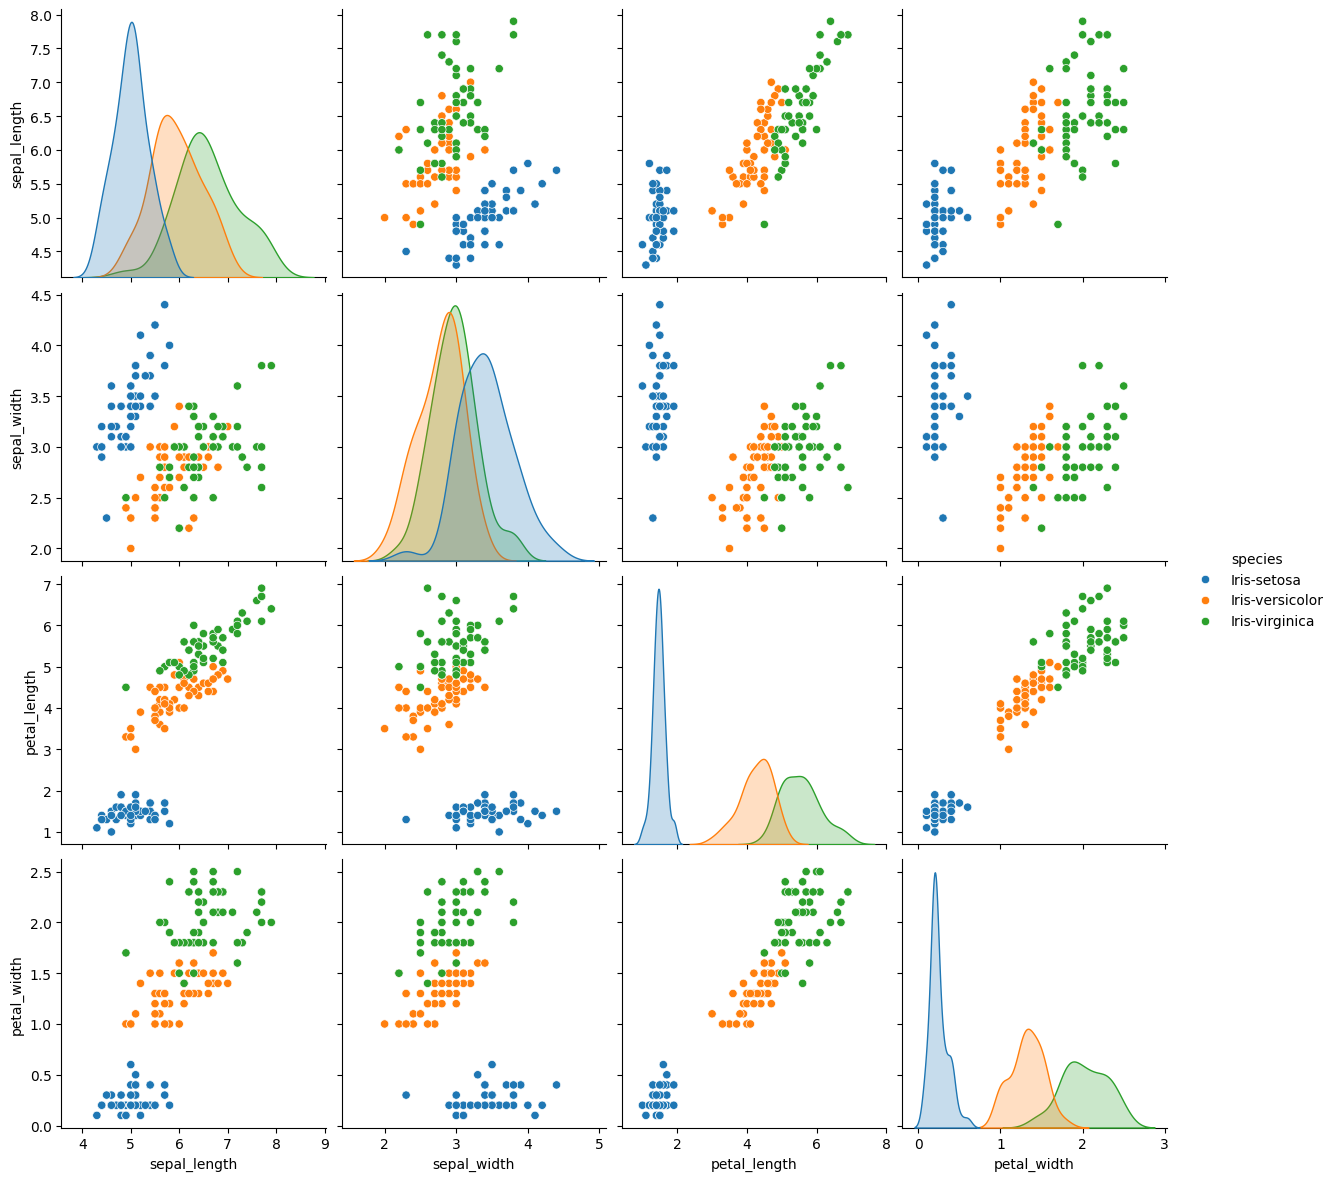

In [10]:


sns.pairplot(iris, hue="species", height=3)
plt.show()

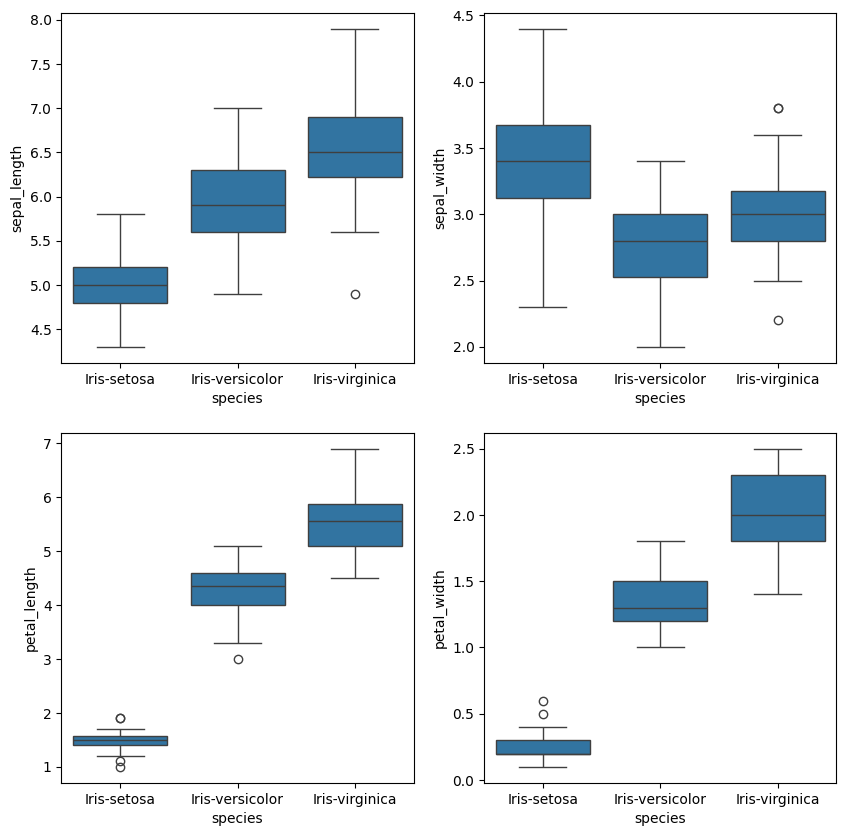

In [11]:
def graph(y):
    sns.boxplot(x="species", y=y, data=iris)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.show()

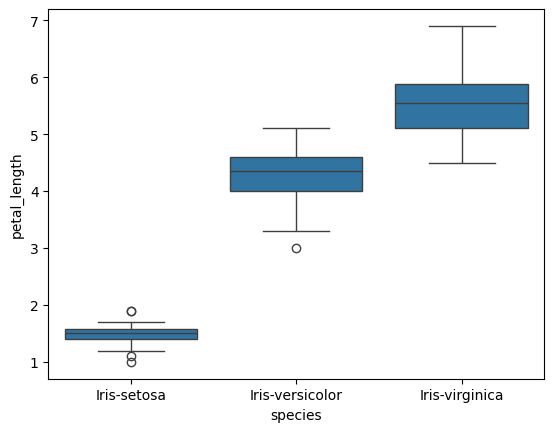

In [12]:

sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

##Corrlation

In [13]:
# corrMatrix = iris.corr()
corrMatrix = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
corrMatrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


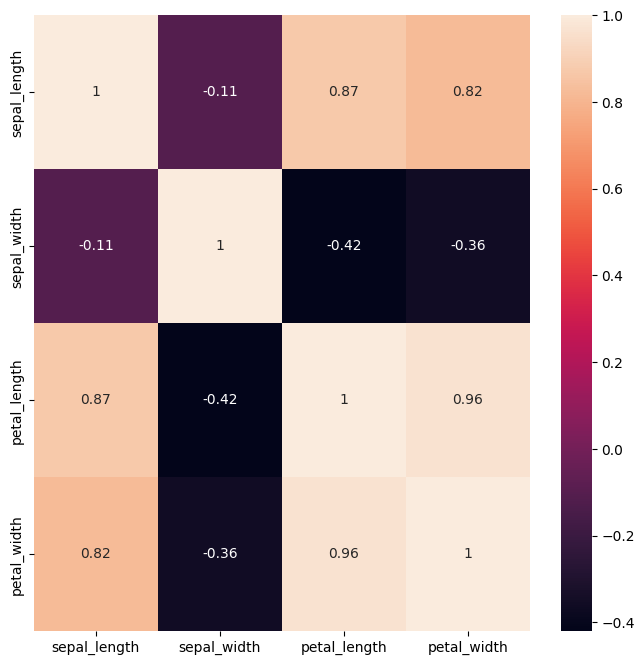

In [14]:
fig = plt.figure(figsize =(8, 8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

##Train & Test Split

In [15]:
X = iris.drop(['species'],axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y = iris['species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [17]:
# Convert string tags to numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


##Neural Networks model

In [21]:
model = keras.Sequential([

    keras.layers.Dense(8, input_shape=(4,), activation='relu'),
    keras.layers.Dense(16, activation='relu', name='hidden'),
    keras.layers.Dense(3, activation='softmax', name='output'),
])


In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 hidden (Dense)              (None, 16)                144       
                                                                 
 output (Dense)              (None, 3)                 51        
                                                                 
Total params: 235 (940.00 Byte)
Trainable params: 235 (940.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [25]:
history = model.fit(X_train, y_train, epochs=150, batch_size=16,validation_data=(X_test, y_test),callbacks = [early_stop])

Epoch 1/150
8/8 [==============================] - 1s 42ms/step - loss: 2.3246 - accuracy: 0.3333 - val_loss: 2.3774 - val_accuracy: 0.3333
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 2.0383 - accuracy: 0.3500 - val_loss: 2.0766 - val_accuracy: 0.5000
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 1.7656 - accuracy: 0.6333 - val_loss: 1.8055 - val_accuracy: 0.6333
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 1.5345 - accuracy: 0.6667 - val_loss: 1.5436 - val_accuracy: 0.6333
Epoch 5/150
8/8 [==============================] - 0s 10ms/step - loss: 1.3241 - accuracy: 0.6667 - val_loss: 1.3153 - val_accuracy: 0.6333
Epoch 6/150
8/8 [==============================] - 0s 7ms/step - loss: 1.1497 - accuracy: 0.6667 - val_loss: 1.1410 - val_accuracy: 0.6333
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 1.0248 - accuracy: 0.6667 - val_loss: 1.0067 - val_accuracy: 0.6333
Epoch 8/150
8/8 [=====

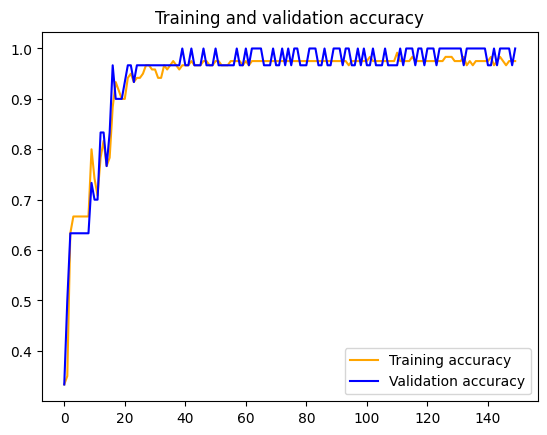

<Figure size 640x480 with 0 Axes>

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [27]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model accuracy on test data: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 28ms/step - loss: 0.1039 - accuracy: 1.0000
Model accuracy on test data: 100.00%
